Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.


The wine quality dataset typically contains various chemical and sensory features that are believed to influence the overall quality of wine. Some key features commonly found in wine quality datasets include:

Fixed Acidity: This refers to the total concentration of all acids present in the wine, primarily tartaric acid. Acidity plays a crucial role in wine taste, affecting its perceived freshness, tartness, and stability.

Volatile Acidity: This represents the concentration of volatile acids, primarily acetic acid, in the wine. High levels of volatile acidity can result in unpleasant vinegar-like flavors and aromas, negatively impacting wine quality.

Citric Acid: Citric acid is a natural component found in grapes and contributes to the overall acidity of the wine. It can impart a refreshing citrus flavor and enhance wine freshness.

Residual Sugar: This refers to the amount of sugar remaining in the wine after fermentation. It influences wine sweetness and body, with higher levels of residual sugar often associated with sweeter wines.

Chlorides: Chloride ions are present in wine, primarily from the soil and grape varieties used. They can affect wine taste and mouthfeel, with excessive chloride levels potentially indicating poor winemaking practices.

Free Sulfur Dioxide (SO2): Sulfur dioxide is commonly used as a preservative in winemaking to prevent oxidation and microbial spoilage. Free SO2 levels impact wine stability and shelf life.

Total Sulfur Dioxide (SO2): This represents the total concentration of both free and bound forms of sulfur dioxide. It's an important parameter for assessing wine preservation and potential health risks.

Density: Density is a measure of the wine's mass per unit volume and can provide insights into its alcohol content and sugar concentration.

pH: pH indicates the acidity or alkalinity of the wine. It influences wine stability, microbial growth, and sensory perceptions.

Alcohol Content: The percentage of alcohol by volume (%ABV) is a critical determinant of wine style, body, and perceived warmth. It contributes to the wine's flavor, texture, and overall balance.

Quality: This is often the target variable in wine quality datasets, representing an expert-rated or sensory-assessed overall quality score. It integrates various sensory attributes and chemical characteristics to provide an overall assessment of wine quality.

Each of these features plays a distinct role in shaping the sensory profile, stability, and overall quality of wine. Understanding their relationships and how they contribute to wine quality is essential for predicting and improving wine quality through winemaking practices and quality control measures.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

Handling missing data is a critical step in the feature engineering process to ensure the quality and reliability of the analysis and predictive models. Several techniques can be used to handle missing data in the wine quality dataset, each with its own advantages and disadvantages:

Dropping Missing Values:

Advantages:
Simple and straightforward.
Preserves the integrity of the remaining data.
Disadvantages:
Can lead to loss of valuable information, especially if missing values are common.
May introduce bias if missingness is not random.

Mean/Median Imputation:
Advantages:
Easy to implement and does not require complex computation.
Preserves the mean or median of the distribution.
Disadvantages:
May distort the original distribution, especially if missing values are not randomly distributed.
Does not account for correlations between variables.

Mode Imputation:

Advantages:
Suitable for categorical variables.
Preserves the mode of the distribution.
Disadvantages:
Similar to mean/median imputation, may introduce bias and distortions.
Does not consider relationships between variables.

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

Standard Lunch This refers to Lunch of the students to perform well in students
Parents Education this refers to eduction of parents 
gender : this refers to gender of students
test_preparation_course: this refers to preparation of the course of students 
race_ethnicity: this refers to which group students belong to

the techniques are
1.histplot
2.correlation

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Data Exploration:

Understand the structure of the dataset, including the types of variables present.
Identify the target variable, which in this case could be exam scores or grades.

Handling Missing Values:

Check for missing values in the dataset and decide on an appropriate strategy for handling them (e.g., imputation, removal, or treating missingness as a separate category).

Feature Selection:

Select relevant features that are likely to influence student performance. This could include variables like parental level of education, test preparation course completion, lunch type, etc.
Drop irrelevant or redundant features that are unlikely to contribute to the model's predictive power.

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

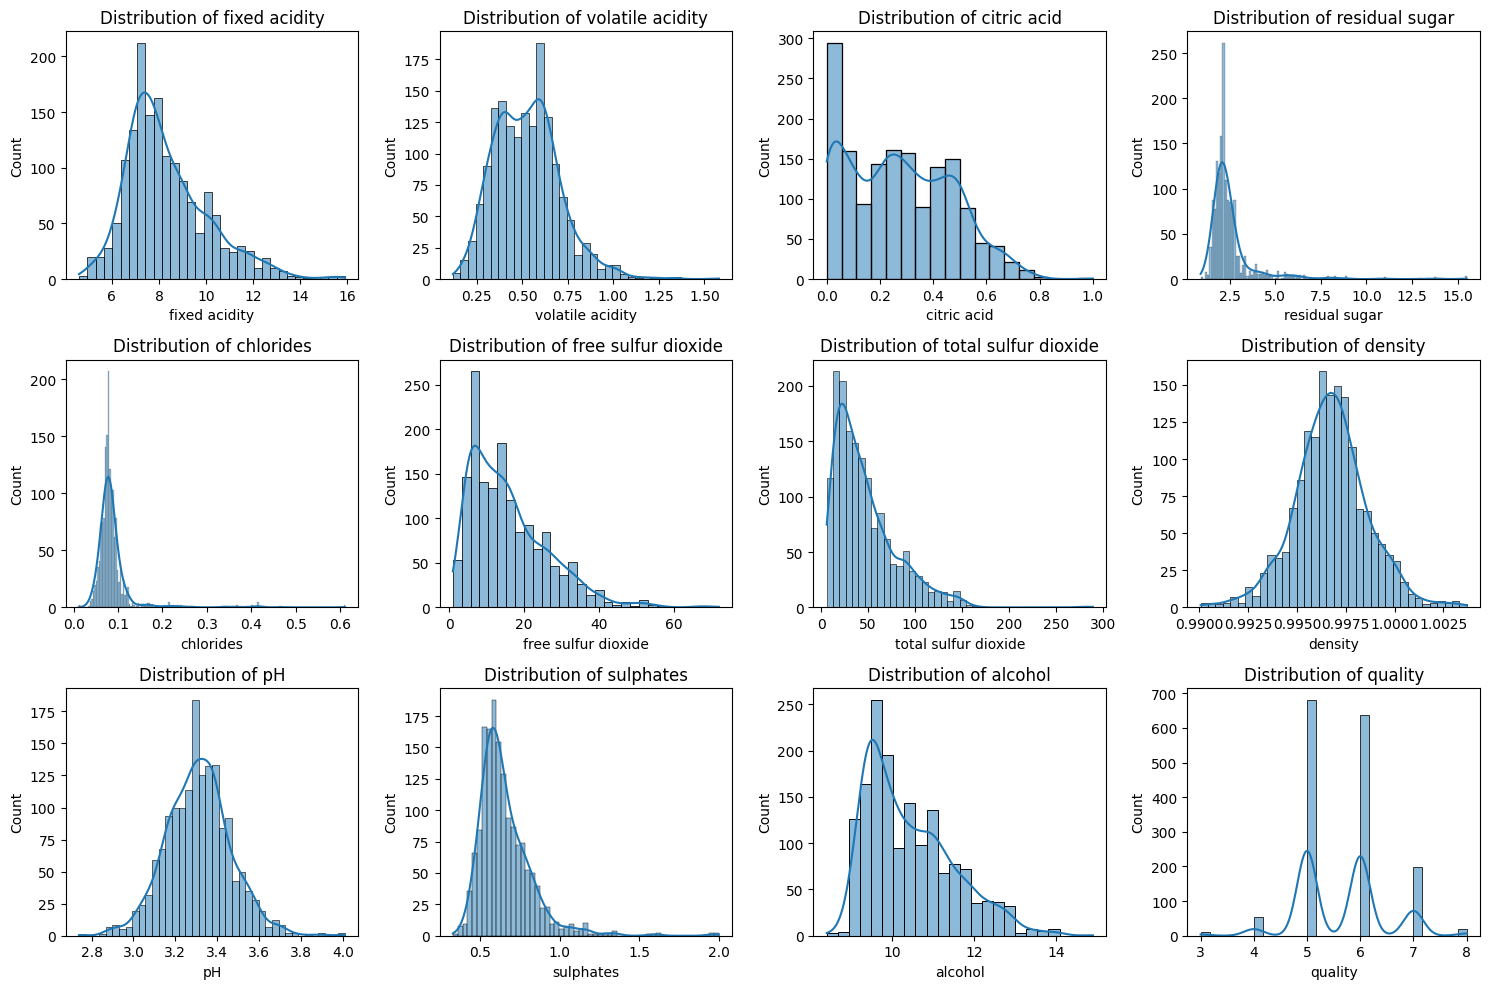

Shapiro-Wilk test for normality:
fixed acidity: p-value=0.0000
volatile acidity: p-value=0.0000
citric acid: p-value=0.0000
residual sugar: p-value=0.0000
chlorides: p-value=0.0000
free sulfur dioxide: p-value=0.0000
total sulfur dioxide: p-value=0.0000
density: p-value=0.0000
pH: p-value=0.0000
sulphates: p-value=0.0000
alcohol: p-value=0.0000
quality: p-value=0.0000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Load the wine quality dataset
wine_data = pd.read_csv("winequality-red.csv")

# Display the first few rows of the dataset
print(wine_data.head())

# Get the list of column names
columns = wine_data.columns

# Visualize the distributions of each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(wine_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Test for normality using Shapiro-Wilk test
print("Shapiro-Wilk test for normality:")
for column in columns:
    stat, p = shapiro(wine_data[column])
    print(f'{column}: p-value={p:.4f}')



Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the wine quality dataset
wine_data = pd.read_csv("winequality-red.csv")

# Separate features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Determine the minimum number of principal components required to explain 90% of the variance
num_components_90_var = sum(cumulative_variance_ratio < 0.9) + 1  # Add 1 to include the component that crosses 90%

print(f"Minimum number of principal components to explain 90% of the variance: {num_components_90_var}")


Minimum number of principal components to explain 90% of the variance: 7
